# Explore here

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib

In [8]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"
df_ventas = pd.read_csv(url, parse_dates=["date"], index_col="date")
print(df_ventas.head())

                                sales
date                                 
2022-09-03 17:10:08.079328  55.292157
2022-09-04 17:10:08.079328  53.803211
2022-09-05 17:10:08.079328  58.141693
2022-09-06 17:10:08.079328  64.530899
2022-09-07 17:10:08.079328  66.013633


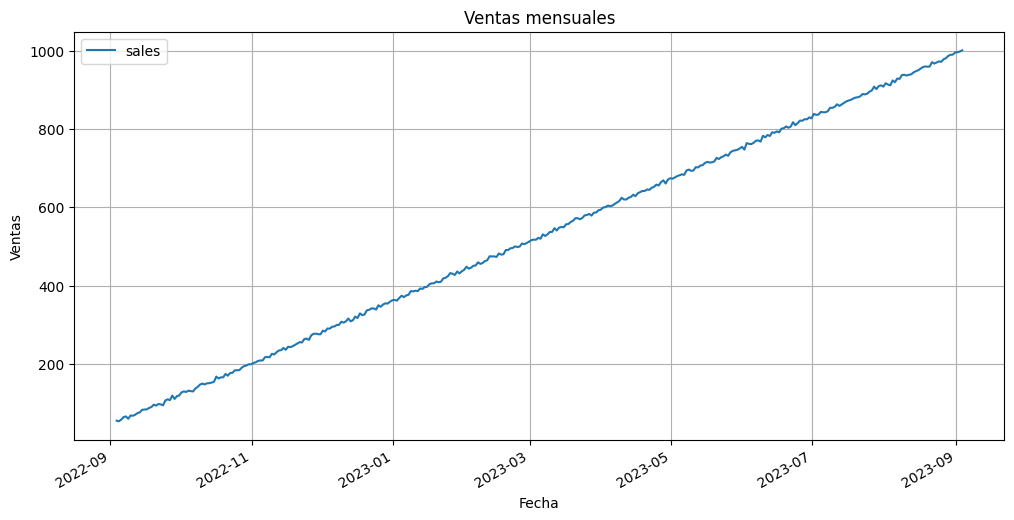

Tensor de la serie temporal (frecuencia): D
ADF Statistic: 0.545414193706378
p-value: 0.9861899815311064
Valor crítico 1%: -3.4490648539347544
Valor crítico 5%: -2.8697861692116478
Valor crítico 10%: -2.5711631253228306


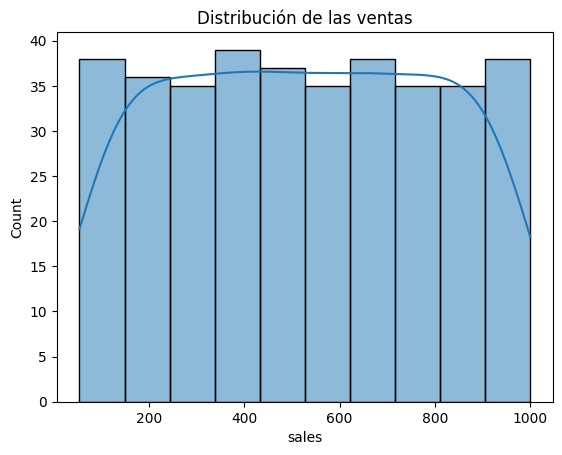

             sales
count   366.000000
mean    524.963968
std     275.089698
min      53.803211
25%     290.186822
50%     520.699468
75%     763.289263
max    1000.482785


In [9]:
df_ventas.plot(figsize=(12, 6), title="Ventas mensuales")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.grid()
plt.show()

# Tensor de la serie (frecuencia inferida)
frecuencia = pd.infer_freq(df_ventas.index)
print("Tensor de la serie temporal (frecuencia):", frecuencia)

# Prueba de Dickey-Fuller para estacionariedad
resultado_adf = adfuller(df_ventas['sales'])
print(f"ADF Statistic: {resultado_adf[0]}")
print(f"p-value: {resultado_adf[1]}")
for clave, valor in resultado_adf[4].items():
    print(f"Valor crítico {clave}: {valor}")

# Visualizar distribución para evaluar ruido
sns.histplot(df_ventas['sales'], kde=True)
plt.title("Distribución de las ventas")
plt.show()

# Estadísticas básicas
print(df_ventas.describe())

In [10]:
# Separar en entrenamiento y prueba (80% - 20%)
tam_entrenamiento = int(len(df_ventas) * 0.8)
serie_entrenamiento = df_ventas[:tam_entrenamiento]
serie_test = df_ventas[tam_entrenamiento:]

# Entrenamiento del modelo ARIMA
modelo_arima = ARIMA(serie_entrenamiento, order=(1, 1, 1))  # Puedes ajustar estos parámetros
modelo_entrenado = modelo_arima.fit()

# Resumen del modelo
print(modelo_entrenado.summary())

/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  292
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -838.546
Date:                Thu, 24 Jul 2025   AIC                           1683.092
Time:                        18:08:51   BIC                           1694.112
Sample:                    09-03-2022   HQIC                          1687.506
                         - 06-21-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001   1863.304      0.000       0.999       1.001
ma.L1         -0.9996      0.473     -2.111      0.035      -1.928      -0.072
sigma2        18.3520      8.857      2.072      0.0

/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


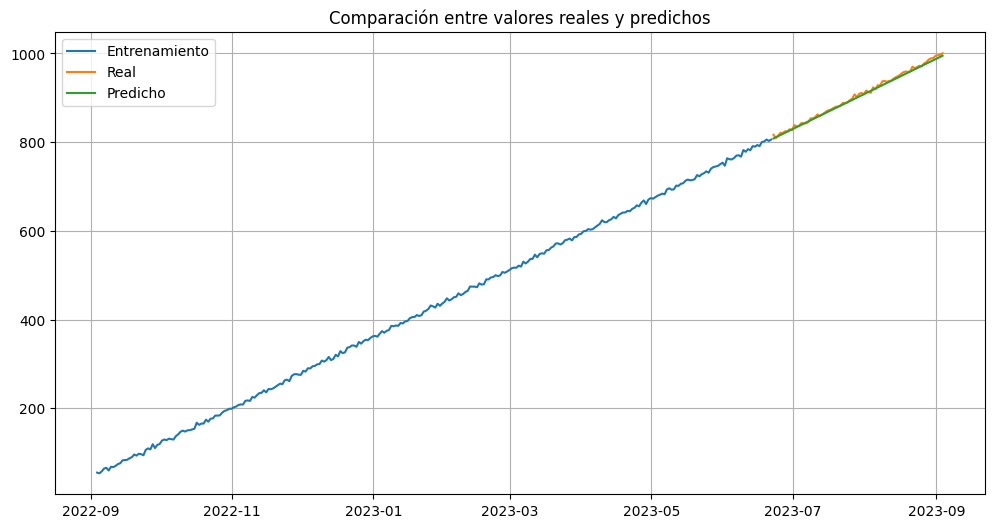

Mean Squared Error (MSE): 16.585962311162486
Mean Absolute Error (MAE): 3.2877558549156123


In [11]:
# Rango de predicción
inicio = len(serie_entrenamiento)
fin = len(df_ventas) - 1

# Predicciones
predicciones = modelo_entrenado.predict(start=inicio, end=fin, typ="levels")

# Agregar predicciones al DataFrame de test
serie_test = serie_test.copy()
serie_test["predicciones"] = predicciones

# Visualización
plt.figure(figsize=(12, 6))
plt.plot(serie_entrenamiento, label="Entrenamiento")
plt.plot(serie_test["sales"], label="Real")
plt.plot(serie_test["predicciones"], label="Predicho")
plt.legend()
plt.title("Comparación entre valores reales y predichos")
plt.grid()
plt.show()

# Métricas de evaluación
mse = mean_squared_error(serie_test["sales"], serie_test["predicciones"])
mae = mean_absolute_error(serie_test["sales"], serie_test["predicciones"])

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

In [12]:
joblib.dump(modelo_entrenado, "modelo_ventas_arima.pkl")
print("Modelo guardado como modelo_ventas_arima.pkl")

Modelo guardado como modelo_ventas_arima.pkl
